In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def printClinicOutCome():
    #print clinic dx stat and save as ClinicOutCome_STAT.txt
    with open('ClinicOutCome_STAT.txt', 'w') as f:
        for i in range(16,40,2):
            f.write("*************************************" + df.columns[i] + "*************************************\n")
            f.write(str(df.iloc[:,i].value_counts()))
            f.write("\n")
    return

def showCTdata_STAT():
    # print CT data stat and save as CTdata_STAT.txt
    data = pd.DataFrame()
    for i in range(41,52):
        if i == 51:
            liverHU = df.iloc[:,i].replace(" ",None)
            liverHU = liverHU.dropna()
            liverHU = pd.to_numeric(liverHU)
            data.insert(data.shape[1],"LiverHU(M)",liverHU.describe())
        else:
            data.insert(data.shape[1],str(df.columns[i]).strip().replace(" ", ""),df.iloc[:,i].describe())
    return data

pd.options.display.float_format = "{:.2f}".format                   
df = pd.read_excel("OppScrData.xlsx")
df.info()
printClinicOutCome()
ct_data = showCTdata_STAT()
ct_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Record ID                                    9223 non-null   int64  
 1   Visit ID                                     9223 non-null   int64  
 2   PT ID                                        9223 non-null   int64  
 3   Clinical F/U interval  [d from CT]           9223 non-null   int64  
 4   BMI                                          9100 non-null   float64
 5   BMI >30                                      9100 non-null   object 
 6   Sex                                          9223 non-null   object 
 7   Age at CT                                    9223 non-null   int64  
 8   Tobacco                                      8615 non-null   object 
 9   Alcohol abuse                                257 non-null    object 
 10  

,L1_HU_BMD,TATArea(cm2),TotalBodyAreaEA(cm2),VATArea(cm2),SATArea(cm2),VAT/SATRatio,MuscleHU,MuscleArea(cm2),L3SMI(cm2/m2),AoCaAgatston,LiverHU(M)
count,9176.00,9091.00,9091.00,9091.00,9091.00,9090.00,9195.00,9195.00,9071.00,9222.00,9176.00
mean,171.17,377.71,672.21,172.99,208.04,0.91,28.91,154.36,52.85,698.80,55.36
std,42.25,188.05,220.51,120.59,105.21,0.71,12.11,45.94,12.53,1747.95,10.36
min,-20.00,0.00,253.38,0.00,0.00,0.13,-118.31,9.38,0.56,0.00,-21.00
25%,142.00,242.51,514.29,84.59,131.46,0.48,22.27,122.02,44.50,0.00,52.00
50%,168.00,355.74,641.16,148.57,189.94,0.72,30.66,147.47,51.85,58.49,58.00
75%,197.00,484.16,787.61,229.83,268.29,1.16,37.51,185.74,60.81,492.84,62.00
max,378.00,1206.22,1859.70,1054.69,763.11,26.34,99.48,1605.74,187.71,36942.92,105.00


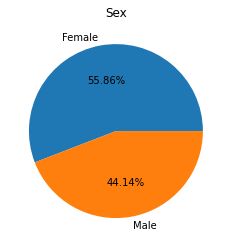

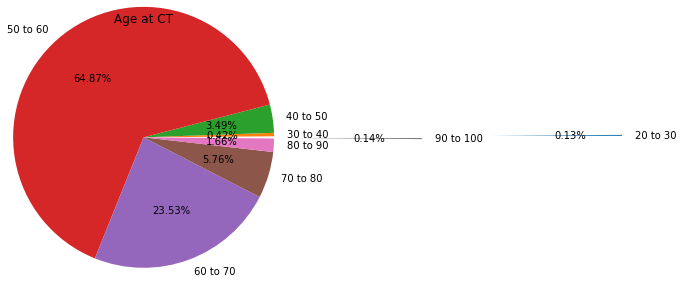

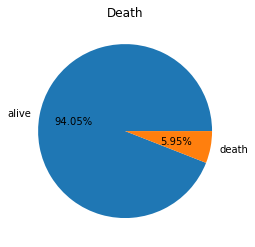

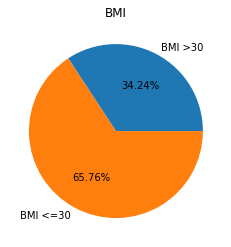

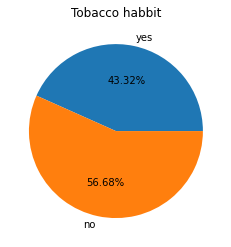

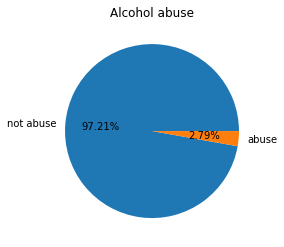

In [2]:
# Demographic pie plots from clinical data
# sex
sex = df["Sex"].value_counts()
female_cnt = sex["Female"]
male_cnt = sex["Male"]
sex_cnt = np.array([female_cnt,male_cnt])
sex_label = np.array(["Female","Male"])
plt.title("Sex") # 
plt.pie(sex_cnt,
        labels=sex_label, 
        autopct='%.2f%%',
       )
plt.show()

# age at CT
age = df["Age at CT"]
age_cnt = np.zeros(8)
age_label = np.array([str(10 * i) + " to "+ str(10 * (i + 1)) for i in range(2,10)])
for i in range(2,10):
    age_cnt[i - 2] = np.count_nonzero(np.logical_and(age >= 10 * i, age < 10 * (i + 1)))
plt.title("Age at CT") 
plt.pie(age_cnt,
        explode = (4, 0, 0, 0, 0, 0, 0, 1.7),
        labels=age_label,
        radius = 1.5,
        autopct='%.2f%%',
       )
plt.show()

#death
death = df["DEATH [d from CT]"]
alive_cnt = np.count_nonzero(np.isnan(death))
death_cnt = np.count_nonzero(np.logical_not(np.isnan(death)))
death_aggre = np.array([alive_cnt,death_cnt])
death_label = np.array(["alive","death"])
plt.pie(death_aggre,
        labels=death_label, 
        autopct='%.2f%%',
       )
plt.title("Death") # 
plt.show()

#BMI
bmi = df["BMI >30"]
y_cnt = np.count_nonzero(bmi == 'Y')
n_cnt = np.count_nonzero(bmi == 'N')
bmi_aggre = np.array([y_cnt,n_cnt])
bmi_label = np.array(["BMI >30","BMI <=30"])
plt.pie(bmi_aggre,
        labels=bmi_label, 
        autopct='%.2f%%',
       )
plt.title("BMI") # 
plt.show()

#Tobacco habbit
tobacco = df["Tobacco"]
t_y_cnt = np.count_nonzero(tobacco == 'Yes')
t_n_cnt = np.count_nonzero(tobacco == 'No')
tobacco_aggre = np.array([t_y_cnt,t_n_cnt])
tobacco_label = np.array(["yes","no"])
plt.pie(tobacco_aggre,
        labels=tobacco_label, 
        autopct='%.2f%%',
       )
plt.title("Tobacco habbit") # 
plt.show()

#Alcohol abuse
alcohol= df["Alcohol abuse"].replace(" ",None)
normal_cnt = 9223 - alcohol.count()
abuse_cnt = alcohol.count()
alcohol_aggre = np.array([normal_cnt,abuse_cnt])
alcohol_label = np.array(["not abuse","abuse"])
plt.pie(alcohol_aggre,
        labels=alcohol_label, 
        autopct='%.2f%%',
       )
plt.title("Alcohol abuse") # 
plt.show()

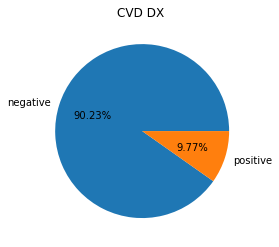

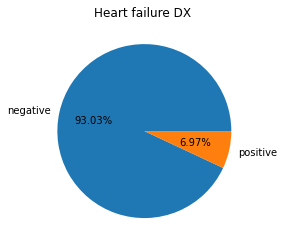

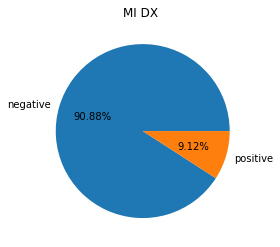

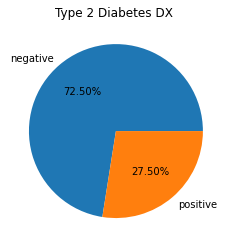

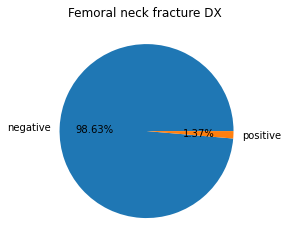

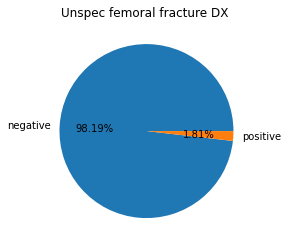

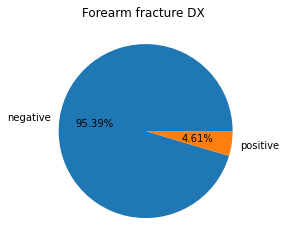

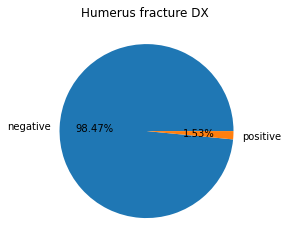

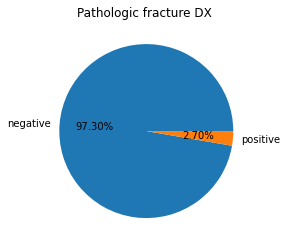

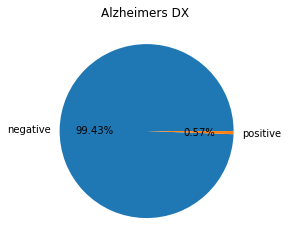

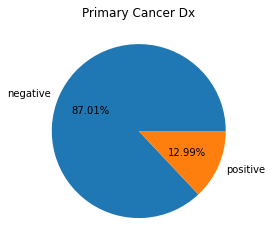

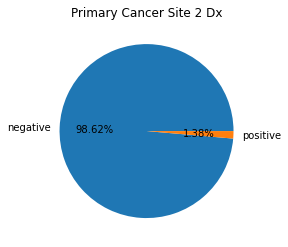

In [3]:
# show pie plots from clinical outcome
for i in range(17,41,2):
    cur = df.iloc[:,i]
    negative_cnt = np.count_nonzero(np.isnan(cur))
    positive_cnt = np.count_nonzero(np.logical_not(np.isnan(cur)))
    cur_aggre = np.array([negative_cnt,positive_cnt])
    cur_label = np.array(["negative","positive"])
    plt.pie(cur_aggre,
            labels=cur_label, 
            autopct='%.2f%%',
           )
    title = df.columns[i]
    if(i == 39 or i == 37): # Cancer site
        title = title[:-12]
    else:
        title = title[:-16]
    plt.title(title) 
    plt.show() 